In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

<font color='red' size='5'>ch01 영상처리 개요</font>
# 1절 이미지 읽기/쓰기

- pip install opencv-python : 파이썬용 openCV 설치
- pip install opencv-contrib-python : 추가 cv 모듈 설치
- openCV는 numpy 패키지 필수 설치

In [2]:
! pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\pc\appdata\roaming\python\python310\site-packages
Requires: numpy, numpy, numpy, numpy
Required-by: 


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(577, 700, 3) (577, 700, 3)


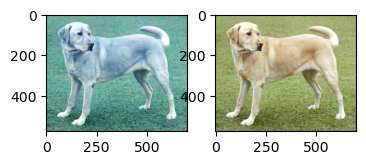

In [6]:
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_bgr.shape, image_rgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[1].imshow(image_rgb)
plt.show()

In [9]:
# 넘파이 배열을 이미지 파일로 저장(폴더가 없으면 False, 결과가 True여야 저장 완료)
cv2.imwrite('data/openCV/bgr.jpg', image_bgr) # cv2로 저장시 bgr포맷으로 변경된 넘파이를 저장
cv2.imwrite('data/openCV/rgb.jpg', image_rgb)

True

(577, 700) (577, 700, 3)


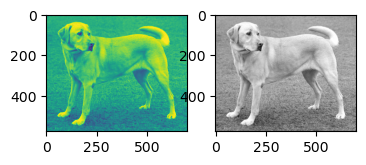

In [12]:
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE) #gray포맷
image_grgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB) # gray=>rgb
print(image_gray.shape, image_grgb.shape)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_gray)
axes[1].imshow(image_grgb)
plt.show()

In [14]:
# 이미지 저장
cv2.imwrite('data/openCV/gray.jpg', image_gray)
cv2.imwrite('data/openCV/grgb.jpg', image_grgb)

True

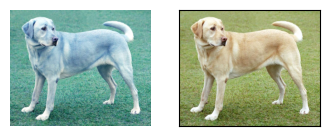

In [30]:
# bgr포맷 이미지의 b, g, r채널값을 조정해서 rgb 포맷으로 변경
image_bgr = cv2.imread('data/sample.jpg', cv2.IMREAD_ANYCOLOR)
b, g, r = cv2.split(image_bgr)
image_rgb = cv2.merge([r, g, b])
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(image_bgr)
axes[0].axis('off') # 축 생략
axes[1].imshow(image_rgb)
axes[1].set_xticks([]) # x,y축을 빈 리스트
axes[1].set_yticks([])
plt.show()

# 2절 도형그리기

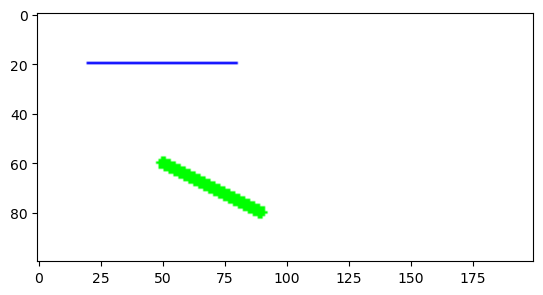

In [41]:
# 선그리기
img = np.full((100,200, 3), # 100,200,3 배열
             255,  # 배열 안에 채울 값
             dtype=np.uint8) # 배열안의 값의 타입이 부호가 없는 정수(unsigned int 8 bit)
cv2.line(img,       # img 위에 line을 추가
         (20,20),   # 선 시작점 (x, y)
         (80,20),   # 선 끝점 (x, y)
         (255,0,0), # 선 색상 cv2에서는 BGR
         1          # 선 굵기
        )
cv2.line(img, (50,60), (90,80), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cv2.imwrite('data/openCV/ling.png', img)
# cv2.imshow('title', img) # 저장된 파일과 같은 포맷으로 출력
# cv2.waitKey(0) # 키보드 입력할 때까지 기다리기
# cv2.destroyAllWindows() # openCV 창 모두 닫기

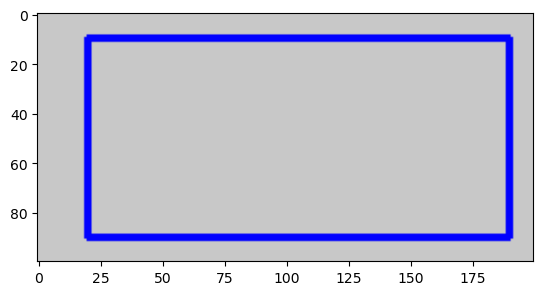

In [43]:
# 사각형 그리기
img = np.full((100,200,3), 200, dtype=np.uint8)
cv2.rectangle(img,
             (20,10), # 사각형왼쪽윗부분 좌표
             (190,90), # 사각형 오른쪽 아랫부분 좌표 
             (255,0,0) , # 사각형 색상 BGR 포맷
             2 # 두께
             )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

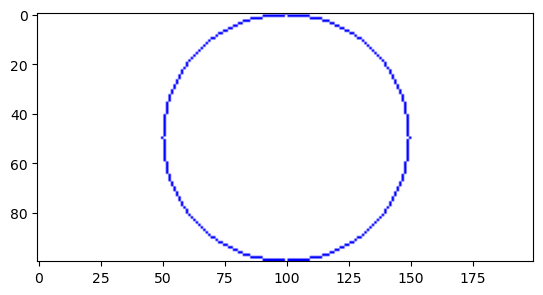

In [46]:
# 원그리기
img = np.full((100,200,3), 255, dtype=np.uint8)
cv2.circle(img, 
          (100,50), # 원 중심점 (x, y)
          50, # 반지름
          (255,0,0), # 원색상
          # 원두께 생략시 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

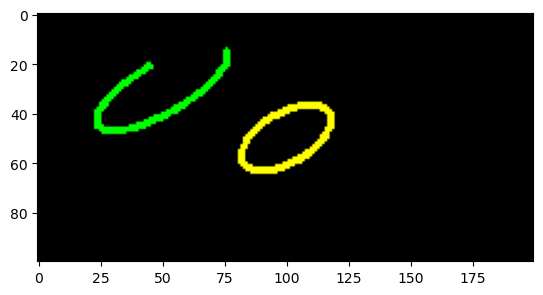

In [55]:
# 호와 타원그리기
img = np.zeros((100,200,3), dtype=np.uint8)
# 타원
cv2.ellipse(img, (100,50), # 타원의 중심(x,y)
           (20, 10), # 두 축의 반지름 (가로, 세로)
           -30,  # 반시계방향 30도 회전
           0, 360, # 타원의 시작각도 ~ 끝각도
           (0, 255, 255),
            2
           )
# 초록색호
cv2.ellipse(img, (50,30), # 타원의 중심(x,y)
           (30, 10), # 두 축의 반지름 (가로, 세로)
           -30,  # 반시계방향 30도 회전
           0, 270, # 타원의 시작각도 ~ 끝각도
           (0, 255, 0),
            2
           )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

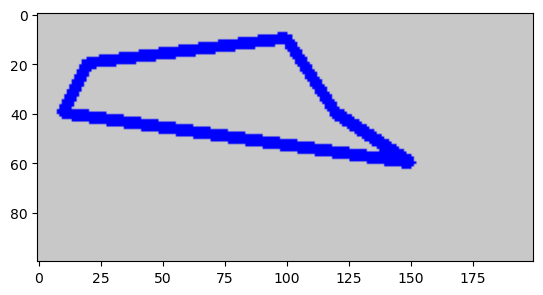

In [59]:
# 다각형
img = np.full((100,200,3), 200, dtype=np.uint8)
points = np.array([[10,40],
                   [20,20],
                   [100,10],
                   [120,40],
                   [150,60]]) # 꼭지점 좌표들 (x,y)
cv2.polylines(img, [points], # 꼭지점 좌표들
              True,  # True:닫힌 다각형, False:열린다각형
              (255,0,0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(577, 700, 3)


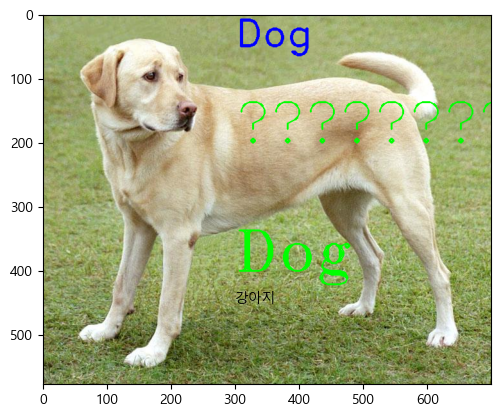

True

In [72]:
# 문자열 표시하기
plt.rc('font', family='Malgun Gothic') 
img = cv2.imread('data/sample.jpg')
print(img.shape)
cv2.putText(img, 'Dog', # 추가될 문자열
           (300, 50), # 문자열이 표시될 좌표 (x, y)
           cv2.FONT_HERSHEY_DUPLEX,
           2,           # 폰트 scale
           (255, 0, 0), # 폰트 색상
           2            # 폰트 두께
           )
cv2.putText(img, '강아지', (300, 200), cv2.FONT_ITALIC, 3, (0, 255, 0), 2)
cv2.putText(img, 'Dog', (300, 400), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.text(300, 450, '강아지')
plt.show()
#cv2.imwrite('delete.jpg', img)

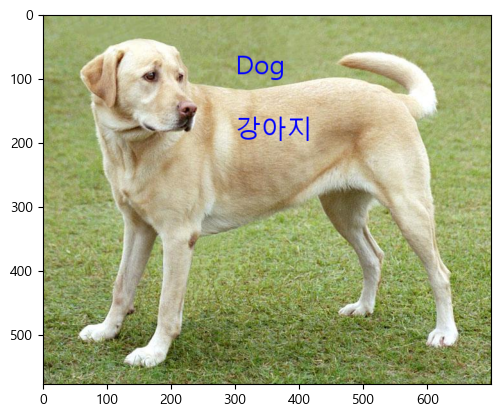

True

In [74]:
from PIL import Image, ImageDraw, ImageFont
img = cv2.imread('data/sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 넘파이 배열
img_pil = Image.fromarray(img) # Image 타입
draw = ImageDraw.Draw(img_pil) # 이미지에 글씨를 draw하는 객체
font = ImageFont.truetype('malgun.ttf', 40)

# text 추가
draw.text((300,50), 'Dog', font=font, fill=(255,0,0))
draw.text((300,150), '강아지', font=font, fill=(255,0,0))

img = np.array(img_pil)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('data/openCV/sample.jpg', img)